# Introduction

This is the julia version of the directed search problem with incomplete information. Whether you use julia or sagemath or some commercially produced computer algebra system, symbolic computations are probably the only way to properly understand the subgame perfect equilibrium for this problem.

We'll show below that when workers are equally productive in the two worker two firm version of the problem, then there won't be a pure strategy equilibrium in firms' wages.  It seems hard to imagine that this problem could be solved by hand, but maybe it is just my limited imagination and patience telling me this.

There are two firms, 1 and 2 and two workers, each of whom applies to one and only one of the firms.  The firms earn revenues of $y_1$ and $y_2$ respectively if they are able to hire a worker. They offer wages $w_1$ and $w_2$. If only a single worker applies to a firm, the firm hires that worker.  In that case, the firm gets its revenue less the wage that it pays, the worker gets the wage.

If two workers apply to the same firm, the firm will select the worker with the most desirable type.  Workers types are given by $h$ or $l$. Each firm will hire a type $h$ if one applies.  Otherwise they are happy to hire a type $l$.  In cases where two workers are considered equally good, the firm will hire each of them with probability $\frac{1}{2}$.

Firms with no applicants and workers who are not offered a job get nothing.

We'll look for a symmetric subgame perect equilibrium of the directed search game in which workers of the same type use the same application strategy. Recall the basic assumption of directed search - both workers see the wage offers made by the firms and use an application strategy that depends on those wages.

To make this a model of incomplete information, we'll assume that workers know their own types, but not the other worker's type.  Firms don't know the workers' types but can observe these types when the worker apply.  It is common belief that each worker is type $h$ with probability $\lambda$.

# Workers

As always, to find a subgame perfect equilibrium you need to start with the last sub-game.  This is the one where workers apply.  There are two types of workers, so we want to find two mixed strategies, represented by $\pi_h$ and $\pi_l$, where $\pi_j$ is the probability that a worker of type $j$ applies to firm 1 (the one offering wage $w_1$

As you now know, the best way to find a mixed strategy is to write down an indifference condition.  For example, if you are a worker of type $H$, then you should expect your opponent to play in a way that makes you indifferent between your options. 

For a type $H$ worker, this is straightforward because the type $H$ workers don't care what type $L$ workers do.  So we can write the indifference condition as
$$
\lambda \{\pi_h \frac{w_1}{2} +(1-\pi_h)w_1\}+(1-\lambda)w_1 =
\lambda \{\pi_h w_2 +(1-\pi_h)\frac{w_2}{2}\}+(1-\lambda)w_2
$$

We are ready to start to figure this game out using symbolics.

In [1]:
using SymPy
w_1, w_2 = symbols("w_1, w_2",real=true,positive=true)
pi_h, pi_l, y_1, y_2, lambda = symbols("pi_h, pi_l, y_1, y_2, lambda")
using Plots

## Type H

Since type $h$ workers are always hired ahead of type $l$ workers, type $h$ workers don't care what type $l$ workers do.  So finding the continuation strategy involves just a trivial modification of what you would do with complete information.

In [2]:
lefth = lambda*(pi_h*(w_1/2)+(1-pi_h)w_1)+(1-lambda)*w_1

  ⎛πₕ⋅w₁              ⎞             
λ⋅⎜───── + w₁⋅(1 - πₕ)⎟ + w₁⋅(1 - λ)
  ⎝  2                ⎠             

In [3]:
righth =lambda*(pi_h*w_2+(1-pi_h)w_2/2)+(1-lambda)w_2

  ⎛        w₂⋅(1 - πₕ)⎞             
λ⋅⎜πₕ⋅w₂ + ───────────⎟ + w₂⋅(1 - λ)
  ⎝             2     ⎠             

In [4]:
probh_simp = solve(lefth-righth,pi_h)[1]

λ⋅w₂ + 2⋅w₁ - 2⋅w₂
──────────────────
   λ⋅(w₁ + w₂)    

The complication with this formula is that, because we want a subgame perfect equilibrium, we aren't yet sure what firms' wages will be.  The formula above could give a solution larger than 1 or less that 0, neither of which make sense here.  This is really what makes this problem so complicated to solve on paper.  In any case we can use the following trick - when a strategy is dominant, the solution for `probh_simp` will be larger than 1, similarly for a dominated strategy.  Symbolics lets us use the following trick.

In [5]:
probh = max(min(probh_simp,1),0)

Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2))))

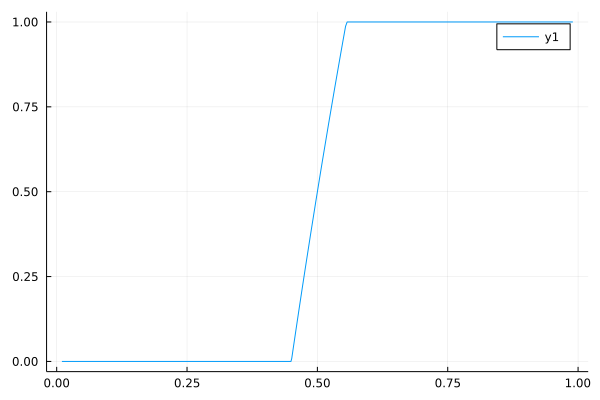

In [6]:
plot(probh(w_2=>1/2,lambda=>.2),.01,.99)

1

, which is just the compete information case
As always, it is good to check that your computations are working by looking at special cases where you already know the solution.  If you have looked at the notebook that describes the directed search game with complete information, then one thing you can do is to check what happens when $\lambda=1$, which is just the compete information case

In [7]:
probh(lambda => 1)

Max(0, Min(1, (2*w_1 - w_2)/(w_1 + w_2)))

That check passes, a second special case is when $w_1=w_2$:

In [8]:
probh(w_1 => w_2)

1/2

## Type L

For type $l$ workers the problem is more complicated because they do care what the type $h$ worker does.  If they apply to firm 1, their expected payoff is
$$
\lambda(1-\pi_h)w_1+(1-\lambda)\{(\pi_l \frac{w_1}{2})+(1-\pi_l)w_1\}
$$
while if they apply to firm 2 it is
$$
\lambda\pi_h w_2 +(1-\lambda)\{\pi_l w_2 +(1-\pi_l)\frac{w_2}{2}\}
$$

In [9]:
leftl = lambda*(1-probh)*w_1 + (1-lambda)*(pi_l*w_1/2 +(1-pi_l)*w_1)

                                                                              
λ⋅w₁⋅(1 - Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2))))) +
                                                                              

         ⎛πₗ⋅w₁              ⎞
 (1 - λ)⋅⎜───── + w₁⋅(1 - πₗ)⎟
         ⎝  2                ⎠

In [10]:
rightl = lambda*probh*w_2 +(1-lambda)*(pi_l*w_2+(1-pi_l)*w_2/2)

                                                                              
λ⋅w₂⋅Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) + (1 - 
                                                                              

   ⎛        w₂⋅(1 - πₗ)⎞
λ)⋅⎜πₗ⋅w₂ + ───────────⎟
   ⎝             2     ⎠

In [11]:
sol = solve(leftl-rightl,pi_l)[1]

2⋅λ⋅w₁⋅Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) + 2⋅λ
──────────────────────────────────────────────────────────────────────────────
                                                                        λ⋅w₁ +

⋅w₂⋅Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) - λ⋅w₂ -
──────────────────────────────────────────────────────────────────────────────
 λ⋅w₂ - w₁ - w₂                                                               

 2⋅w₁ + w₂
──────────
          

In [12]:
sol(lambda => 0)

-2⋅w₁ + w₂
──────────
 -w₁ - w₂ 

In [13]:
probl = max(min(sol,1),0)

Max(0, Min(1, (2*lambda*w_1*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda
*(w_1 + w_2)))) + 2*lambda*w_2*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lam
bda*(w_1 + w_2)))) - lambda*w_2 - 2*w_1 + w_2)/(lambda*w_1 + lambda*w_2 - w_1 
- w_2)))

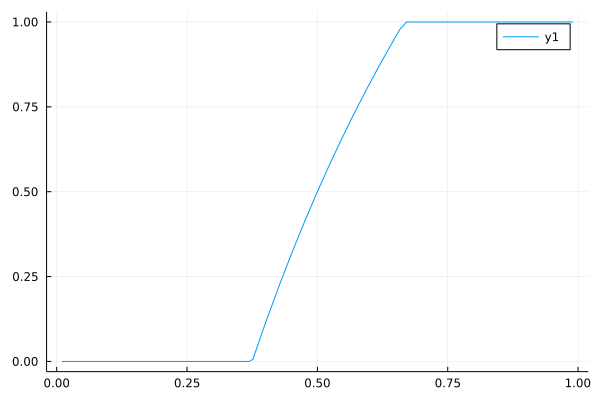

In [14]:

plot(probh(lambda => .5,w_2=>.5),.01,.99)

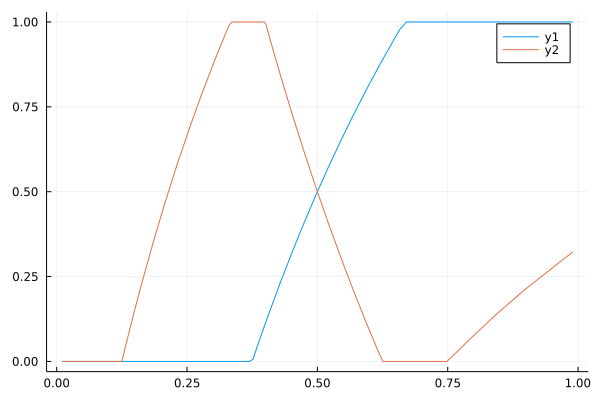

In [15]:
plot!(probl(lambda =>5/10,w_2=>1/2),.01,.99)

To figure out sellers' profits, notice that the seller doesn't really care which type of employee he or she hires because they are both equally productive.  There is no real reason to discriminate between the two types.

To be specific this means that the seller will earn their profit as long as at least one worker applies.  As we described above, if a worker has type $h$ they apply with probability $\pi_h$, if they have type $l$ the probability they apply is $\pi_l$.  Then any particular worker applies to the firm with probability $\lambda\pi_h+(1-\lambda)\pi_l$.  One way to put this is that a worker applies to the firm 1 with probability $Q_1(w_1,w_2) = \lambda\pi_h+(1-\lambda)\pi_l$.

In [16]:
Q1 = lambda*probh+(1-lambda)*probl

λ⋅Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) + (1 - λ)⋅
Max(0, Min(1, (2*lambda*w_1*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda
*(w_1 + w_2)))) + 2*lambda*w_2*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lam
bda*(w_1 + w_2)))) - lambda*w_2 - 2*w_1 + w_2)/(lambda*w_1 + lambda*w_2 - w_1 
- w_2)))

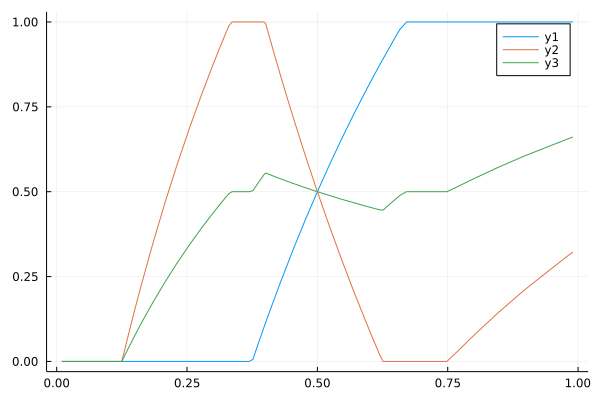

In [17]:
plot!(Q1(lambda =>5/10,w_2=>1/2),.01,.99)

In [18]:
prof = (y_1-w_1)*(1-(1-(lambda*probh+(1-lambda)*probl))^2)

⎛                                                                             
⎝1 - (-λ⋅Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)))) - (

                                                                              
1 - λ)⋅Max(0, Min(1, (2*lambda*w_1*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/

                                                                              
(lambda*(w_1 + w_2)))) + 2*lambda*w_2*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_

                                                                              
2)/(lambda*(w_1 + w_2)))) - lambda*w_2 - 2*w_1 + w_2)/(lambda*w_1 + lambda*w_2

                    2⎞           
 - w_1 - w_2))) + 1) ⎠⋅(-w₁ + y₁)

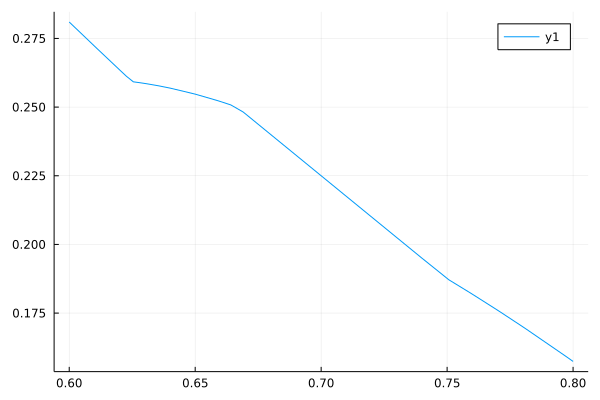

In [19]:
plot(prof(lambda => 1/2,w_2 => 1/2,y_1 => 1),0.6,.8)

In [20]:
dprof = simplify(diff(prof,w_1))

         2 ⎛                                                                  
(w₁ + w₂) ⋅⎝(-λ⋅Max(0, Min(1, (lambda*w_2 + 2*w_1 - 2*w_2)/(lambda*(w_1 + w_2)
                                                                              
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                                                                              
))) + (λ - 1)⋅Max(0, Min(1, (2*lambda*w_1*Max(0, Min(1, (lambda*w_2 + 2*w_1 - 
                                                                              
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                                                  

In [21]:
dprof(w_1 => w_2, lambda => 1/2)

     ⎛        4         3          ⎞
0.25⋅⎝- 3.0⋅w₂  + 1.0⋅w₂ ⋅(w₂ - y₁)⎠
────────────────────────────────────
                  4                 
                w₂                  